## Mounting Google Drive and importing libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Important funcs:

In [0]:
#dividing BMI in 4 categories:[below 18.5, 18.5-24.9, 25-29.9, 30 or above]
def BMI_wrangler(row):
    if row['BMI'] <18.5:
        return 'Underweight'
    elif row['BMI']  >= 18.5 and row['BMI'] < 25:
        return 'Healthy'
    elif row['BMI'] >= 25:
        return 'Overweight'
    

In [0]:
#dividing data into different age groups:[30-40,40-50,50-60,60-70]

def age_wrangler(row):
    if row['age'] >= 31 and row['age'] <= 40:
        return '31-40'
    elif row['age']  >= 41 and row['age'] <= 50:
        return '41-50'
    elif row['age'] >= 51 and row['age'] <= 60:
        return '51-60'
    elif row['age'] >= 61 and row['age'] <= 70:
        return '61-70'
   


## Load data:

In [0]:
def load_data():
  df = pd.read_csv("drive/My Drive/framingham.csv")
  #Renaming the column name
  df.rename(columns={'male':'isMale'},inplace=True)
  return df

In [0]:
df = load_data()

## EDA:

In [0]:
df["TenYearCHD"].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [0]:
#bar graphs:
df.count(figsize=(20, 20))
plt.show()

In [0]:
sns.pairplot(data=df)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


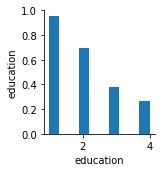

In [0]:
sns.pairplot(data=df, vars = ["education"])

In [0]:
df_analysis = df.copy()
df_analysis['age_cat'] = df_analysis.apply(lambda row: age_wrangler(row), axis=1)
df_analysis['weightStatus'] = df_analysis.apply(lambda row: BMI_wrangler(row), axis=1)

In [0]:
df_analysis.columns = ['gender',
 'age',
 'educationalBackground',
 'isCurrentSmoker?',
 'cigsPerDay',
 'tookBPMeds?',
 'hadPrevalentStroke?',
 'hadPrevalentHyp?',
 'hadDiabetes?',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'weightStatus',
 'age_cat']

In [0]:
df_analysis.head()

,gender,age,educationalBackground,isCurrentSmoker?,cigsPerDay,tookBPMeds?,hadPrevalentStroke?,hadPrevalentHyp?,hadDiabetes?,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,weightStatus,age_cat
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,31-40,Overweight
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,41-50,Overweight
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,41-50,Overweight
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,61-70,Overweight
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,41-50,Healthy


In [0]:
#make understandable labels:
df_analysis.gender.replace((1, 0), ("male", "female"), inplace=True)
df_analysis.educationalBackground.replace((1, 2,3,4), ("no education", "schoolPassed", "someCollege","highlyEducated"), inplace=True)
df_analysis["isCurrentSmoker?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["tookBPMeds?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadPrevalentStroke?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadPrevalentHyp?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadDiabetes?"].replace((1, 0), ("yes", "no"), inplace=True)

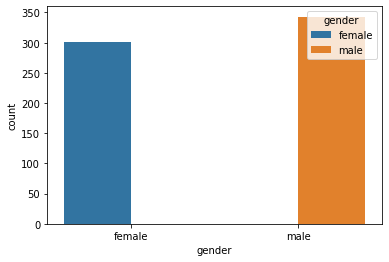

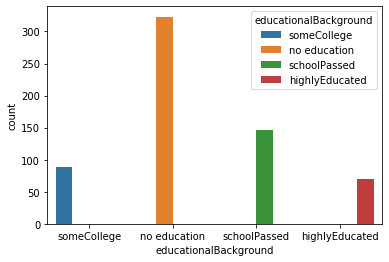

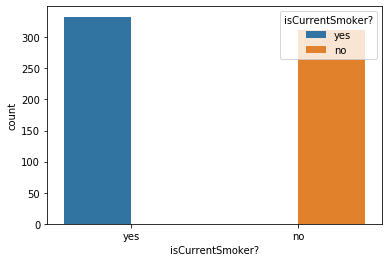

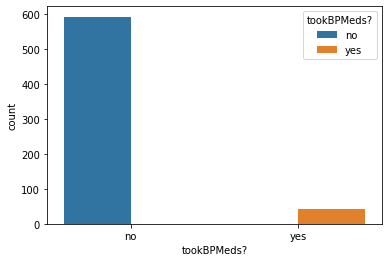

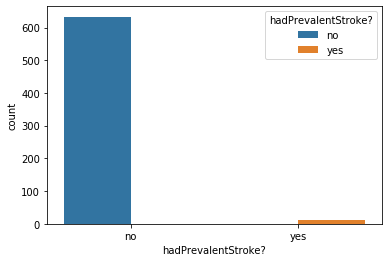

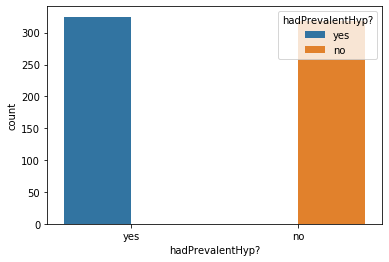

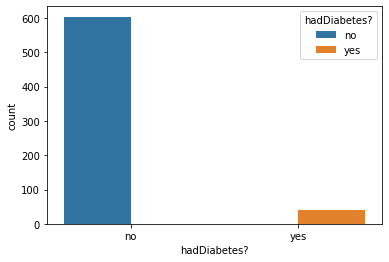

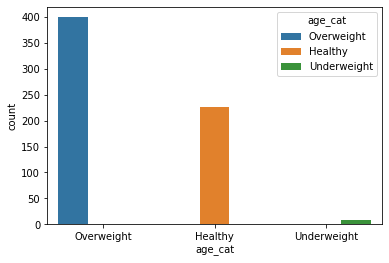

In [0]:
#count plots:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","age_cat"]
df_ext = df_analysis[df_analysis["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()

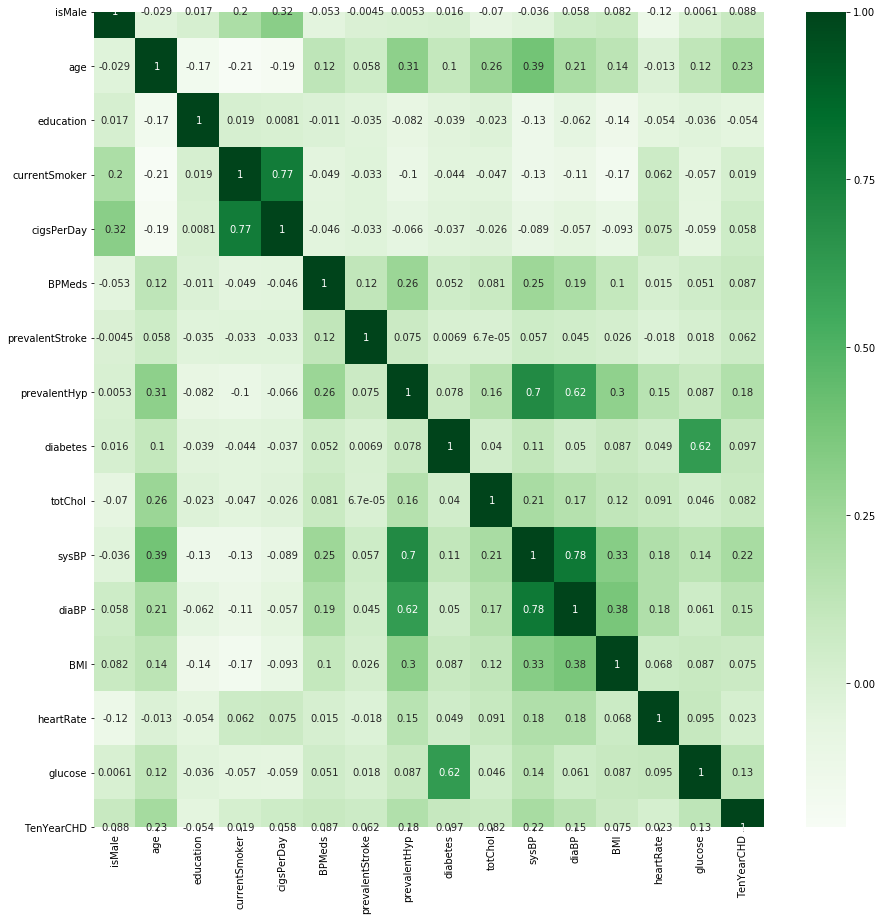

In [0]:
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df.corr(),cmap='Greens', annot = True)
#heatmap.figure.savefig("/content/drive/My Drive/project-1/initHeatmap.png")

## DATA PRE-PROCESSING:

In [0]:
# Checking the missing values 
df.isnull().sum()

isMale               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df.dtypes

isMale               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [0]:
count=0
for i in df.isnull().sum(axis=1):
  if i>0:
    count += 1
print("number of rows with NaN: " + str(count))

number of rows with NaN: 582


In [0]:
#removing rows containing missing values:
df.dropna(axis=0,inplace=True)

In [0]:
df.isnull().sum()

isMale             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [0]:
df['weightStatus'] = df.apply(lambda row: BMI_wrangler(row), axis=1)

plotting bar graphs with newly generated features:

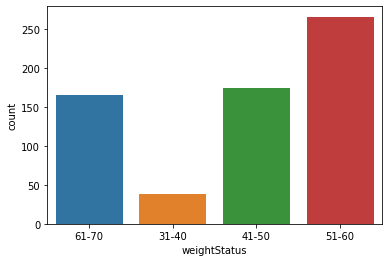

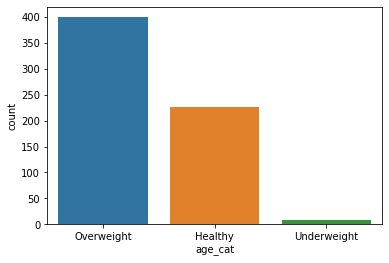

In [0]:
cat_var = ["weightStatus","age_cat"]

df_ext = df_analysis[df_analysis["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i), data = df_ext)
  plt.show()
  

Performing chi-square test:

In [0]:
#for chi-sq test, encoding newly formed features with Label encoder:
#run missing values removal again:
df_new = df
categorical_feature_mask = df_new.dtypes==object

categorical_cols = df_new.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new[categorical_cols] = df_new[categorical_cols].apply(lambda col: le.fit_transform(col))

In [0]:
#Adding a constant
from statsmodels.tools import add_constant as add_constant
df1 = add_constant(df_new)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
df1 = df1[['const', 'isMale', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'weightStatus', 'TenYearCHD']]

In [0]:
cols=df1.columns[:-1]
model=sm.Logit(df_new.TenYearCHD,df1[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.376530
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3639
Method:                           MLE   Df Model:                           16
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:                  0.1177
Time:                        14:08:02   Log-Likelihood:                -1376.6
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.485e-68
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1388      0.737    -11.041      0.000      -9.584      -6.694
isMale              0.5428      0.110      4.949      0.000       0.328       0.758
age                 0.0633      0.007      9.476      0.000       0.050       0.076
education          -0.0462      0.049     -0.935      0.350      -0.143       0.051
currentSmoker       0.0761      0.157      0.485      0.628      -0.231       0.383
cigsPerDay          0.0179      0.006      2.875      0.004       0.006       0.030
BPMeds              0.1595      0.234      0.680      0.496      -0.300       0.619
prevalentStroke     0.7156      0.489      1.462      0.144      -0.244       1.675
prevalentHyp        0.2322      0.138      1.683      0.092      -0.038       0.503
diabetes            0.0431      0.315      0.137      0.891      -0.575       0.661
totChol             0.0023      0.001      2.015      0.044    6.23e-05       0.004
sysBP               0.0155      0.004      4.065      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.657      0.511      -0.017       0.008
BMI                -0.0021      0.015     -0.139      0.889      -0.032       0.028
heartRate          -0.0034      0.004     -0.806      0.420      -0.012       0.005
glucose             0.0071      0.002      3.167      0.002       0.003       0.011
weightStatus        0.1239      0.122      1.013      0.311      -0.116       0.364
===================================================================================
"""

In [0]:
def back_feature_elem (data_frame,dep_var,col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.3):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df1,df.TenYearCHD,cols)

In [0]:
#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue*100
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue(%)']
print ((conf.iloc[:, 2:]))

                 Odds Ratio  pvalue(%)
const              0.000159        0.0
isMale             1.714614        0.0
age                1.067600        0.0
cigsPerDay         1.020078        0.0
prevalentStroke    2.142208       11.6
prevalentHyp       1.240301       11.2
totChol            1.002193        5.1
sysBP              1.014062        0.0
glucose            1.007257        0.0
weightStatus       1.113215       28.5


Final data preparation:

In [0]:
import sklearn
new_features=df[['age','isMale','cigsPerDay','prevalentStroke','prevalentHyp','totChol','sysBP','glucose','weightStatus','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

## SMOTE

In [0]:
#SMOTE:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x, y = smt.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [0]:
x.columns = ['age','isMale','cigsPerDay','prevalentStroke','prevalentHyp','totChol','sysBP','glucose','weightStatus']

In [0]:
x.head()

,age,isMale,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,glucose,weightStatus
0,39.0,1.0,0.0,0.0,0.0,195.0,106.0,77.0,1.0
1,46.0,0.0,0.0,0.0,0.0,250.0,121.0,76.0,1.0
2,48.0,1.0,20.0,0.0,0.0,245.0,127.5,70.0,1.0
3,61.0,0.0,30.0,0.0,1.0,225.0,150.0,103.0,1.0
4,46.0,0.0,23.0,0.0,0.0,285.0,130.0,85.0,0.0


Data split:

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

## CLASSIFICATION AFTER REMOVING "HIGH P-SCORE" FEATURES:

1. Logistic Regression:

In [0]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.preprocessing import binarize
i = 4
 #Train
y_train_pred = logreg.predict(x_train)
y_train_pred=logreg.predict_proba(x_train)
y_train_pred=binarize(y_train_pred,i/10)[:,1]
 #Test
y_test_pred = logreg.predict(x_test)
y_test_pred=logreg.predict_proba(x_test)
y_test_pred=binarize(y_test_pred,i/10)[:,1]

In [0]:
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred))
#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred))

accuracy train:  0.6732553448971359
f1 score train:  0.7184567257559958
accuracy test:  0.6629032258064517
f1 score test:  0.7129120879120879


2. Neural Networks:

In [0]:
from keras.models import Sequential
from keras.layers import Dense
# Define model
model = Sequential()
model.add(Dense(40, input_dim=9, activation= "relu"))
model.add(Dense(15, activation= "relu"))
model.add(Dense(1, activation = "sigmoid"))

Using TensorFlow backend.


In [0]:
# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["binary_accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Fit Model
model.fit(x_train, y_train, epochs=10)




Epoch 1/10





4958/4958 [==============================] - 5s 1ms/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 2/10
4958/4958 [==============================] - 1s 105us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 3/10
4958/4958 [==============================] - 1s 102us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 4/10
4958/4958 [==============================] - 1s 110us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 5/10
4958/4958 [==============================] - 0s 98us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 6/10
4958/4958 [==============================] - 0s 94us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 7/10
4958/4958 [==============================] - 0s 90us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 8/10
4958/4958 [==============================] - 0s 92us/step - loss: 8.0135 - binary_accuracy: 0.5028
Epoch 9/10
4958/4958 [==============================] - 0s 98us/step - loss: 8.0135 - binary_accuracy: 0.5028


In [0]:
from sklearn.preprocessing import binarize
i = 5
 #Train
y_train_pred = clf.predict(x_train)
y_train_pred=clf.predict_proba(x_train)
y_train_pred=binarize(y_train_pred,i/10)[:,1]
 #Test
y_test_pred = clf.predict(x_test)
y_test_pred=clf.predict_proba(x_test)
y_test_pred=binarize(y_test_pred,i/10)[:,1]

NameError: ignored

In [0]:
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred))
#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred))

accuracy train:  0.6732553448971359
f1 score train:  0.7184567257559958
accuracy test:  0.6629032258064517
f1 score test:  0.7129120879120879


3. Random Forest:

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
clf1.fit(x_train,y_train)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.preprocessing import binarize
i = 3
 #Train
y_train_pred = clf1.predict(x_train)
y_train_pred=clf1.predict_proba(x_train)
y_train_pred=binarize(y_train_pred,i/10)[:,1]
 #Test
y_test_pred = clf1.predict(x_test)
y_test_pred=clf1.predict_proba(x_test)
y_test_pred=binarize(y_test_pred,i/10)[:,1]

In [0]:
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred))
#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred))

accuracy train:  0.9045986284792255
f1 score train:  0.9114729552685756
accuracy test:  0.8145161290322581
f1 score test:  0.8366477272727273


Implementation of xgBoost without removing null values:

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

In [0]:
df = load_data()

In [0]:
df.head()

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
df['weightStatus'] = df.apply(lambda row: BMI_wrangler(row), axis=1)

In [0]:
df['age_cat'] = df.apply(lambda row: age_wrangler(row), axis=1)

In [0]:
y = df.TenYearCHD
x = df.copy()
x = x.drop(["BMI","age","TenYearCHD"], axis = 1)

In [0]:
# Label encoder
for c in x.columns[x.dtypes == 'object']:
    x[c] = x[c].factorize()[0]

In [0]:
#Train-test split:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=52)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators = 1000, random_state=60, min_child_weight = 2,scale_pos_weight = 5.56, max_depth = 4)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=60,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.56, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
 #Train
y_train_pred = xgb_model.predict(x_train)
 #Test
y_test_pred = xgb_model.predict(x_test)

In [0]:
import sklearn
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred, average = "weighted"))
print("roc_auc score train: ", sklearn.metrics.roc_auc_score(y_train,y_train_pred))
#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred, average = "weighted"))
print("roc_auc score test: ", sklearn.metrics.roc_auc_score(y_test,y_test_pred))

accuracy train:  0.9882005899705014
f1 score train:  0.9883802382442486
roc_auc score train:  0.9930458970792767
accuracy test:  0.7665094339622641
f1 score test:  0.7665094339622641
roc_auc score test:  0.5502892650524962


Catboost:

In [0]:
# Label encoder
for c in x.columns[x.dtypes == 'object']:
    x[c] = x[c].factorize()[0]

In [0]:
!pip install catboost

     |████████████████████████████████| 62.9MB 48.8MB/s 


In [0]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.01,
                           depth=6,  n_estimators = 1000, random_state=61, scale_pos_weight = 1)
cat.fit(x_train, y_train)

In [0]:
 #Train
y_train_pred = cat.predict(x_train)
 #Test
y_test_pred = cat.predict(x_test)

import sklearn
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred, average = "weighted"))

#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred, average = "weighted"))


accuracy train:  0.8696990424076607
f1 score train:  0.8265077826688771
accuracy test:  0.8346994535519126
f1 score test:  0.7772390475919568


SVM:

In [0]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='rbf', degree = 4)
clf.fit(x_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
 #Train
y_train_pred = clf.predict(x_train)
 #Test
y_test_pred = clf.predict(x_test)

import sklearn
#Train
print("accuracy train: ", sklearn.metrics.accuracy_score(y_train,y_train_pred))
print("f1 score train: ", sklearn.metrics.f1_score(y_train,y_train_pred, average = "weighted"))

#Test
print("accuracy test: ", sklearn.metrics.accuracy_score(y_test,y_test_pred))
print("f1 score test: ", sklearn.metrics.f1_score(y_test,y_test_pred, average = "weighted"))


accuracy train:  0.9982900136798906
f1 score train:  0.9982859991275311
accuracy test:  0.8415300546448088
f1 score test:  0.7691135217525255


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## CLUSTERING OF WHOLE DATA:

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [0]:
df.head()

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,weightStatus
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0


some preprocessing before clustering:

In [0]:
# Label encoder
for c in df.columns[df.dtypes == 'object']:
    df[c] = df[c].factorize()[0]
df.drop(["BMI"],axis = 1, inplace=True)

In [0]:
#standard scaling:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
scaler = StandardScaler()
scaler.fit(df1)
df1 = scaler.transform(df)

In [0]:
df1 = pd.DataFrame(df1)

In [0]:
 from sklearn.decomposition import PCA, KernelPCA
  
pca = KernelPCA(2, kernel = "rbf") 
pca.fit(df1) 
  
pca_data = pd.DataFrame(pca.transform(df1)) 
  
print(pca_data.head())

          0         1
0 -0.165099  0.146624
1  0.031770  0.382485
2 -0.201066 -0.292658
3  0.256047 -0.286291
4 -0.252025 -0.141918


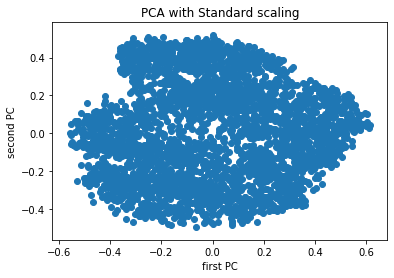

In [0]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
# Add title and axis names
plt.title('PCA with Standard scaling')
plt.xlabel('first PC')
plt.ylabel('second PC')

#plt.show()
plt.savefig('PCA with SS.png')

In [0]:
def makeClusters(numClusters):
  kmeans = KMeans(n_clusters=numClusters)
  kmeans.fit(pca_data)

  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  pred = kmeans.predict(pca_data)
  
  colors = ["g.","r.","c.","y.","m.","b.","k."]


  for i in range(len(pca_data)):
      plt.plot(pca_data.iloc[i][0], pca_data.iloc[i][1], colors[labels[i]], markersize = 10)


  plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
  
  # Add title and axis names
  plt.title('Clustering with 4 clusters')
  plt.xlabel('first PC')
  plt.ylabel('second PC')

  #plt.show()
  plt.savefig('Clustering with 4 clusters')
  
  return labels, pred

Elbow method for clustering:

In [0]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_data) 
    kmeanModel.fit(pca_data)     
      
    distortions.append(sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / pca_data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1
2
3
4
5
6
7
8
9


In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.3473757869592255
2 : 0.2632362465558445
3 : 0.19151093696668703
4 : 0.1638309041009098
5 : 0.14575887164254334
6 : 0.13042331975778873
7 : 0.12175632268292233
8 : 0.11489292793718484
9 : 0.10855587083808799


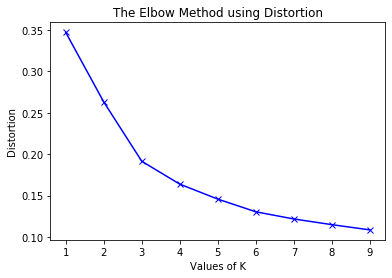

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

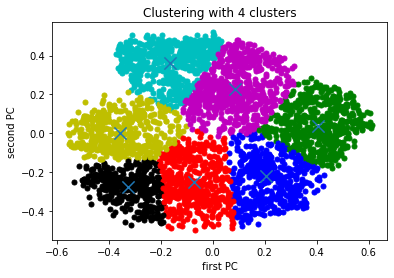

In [0]:
#choosing k=7:
labels, pred = makeClusters(7)

In [0]:
pred = pred.tolist()

In [0]:
df["clusterAlloted"] = pred

In [0]:
df.head(10)

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,weightStatus,clusterAlloted
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,80.0,77.0,0,1,2
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,95.0,76.0,0,1,4
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,75.0,70.0,0,1,6
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,65.0,103.0,1,1,5
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,85.0,85.0,0,0,6
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,77.0,99.0,0,1,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,60.0,85.0,1,1,4
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,79.0,78.0,0,0,3
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,76.0,79.0,0,1,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,93.0,88.0,0,0,5


In [0]:
df_clust_1 = df[df["clusterAlloted"]==0]
df_clust_2 = df[df["clusterAlloted"]==1]
df_clust_3 = df[df["clusterAlloted"]==2]
df_clust_4 = df[df["clusterAlloted"]==3]
df_clust_5 = df[df["clusterAlloted"]==4]
df_clust_6 = df[df["clusterAlloted"]==5]
df_clust_7 = df[df["clusterAlloted"]==6]

In [0]:
#storing value counts:
a = df_clust_1["TenYearCHD"].value_counts()
b = df_clust_2["TenYearCHD"].value_counts()
c = df_clust_3["TenYearCHD"].value_counts()
d = df_clust_4["TenYearCHD"].value_counts()
e = df_clust_5["TenYearCHD"].value_counts()
f = df_clust_6["TenYearCHD"].value_counts()
g = df_clust_7["TenYearCHD"].value_counts()

In [0]:
len(a)

2

In [0]:
df["TenYearCHD"].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [0]:
#probability of occuring a Heart disease in each of the clusters:
probab_THD = {}
probab_THD["clust1"] = a[1]/(a[0] + a[1])
probab_THD["clust2"] = b[1]/(b[0] + b[1])
if(len(c)==1):
  probab_THD["clust3"] = 0.0
else:
  probab_THD["clust3"] = c[1]/(c[0] + c[1])
probab_THD["clust4"] = d[1]/(d[0] + d[1])
probab_THD["clust5"] = e[1]/(e[0] + e[1])
probab_THD["clust6"] = f[1]/(f[0] + f[1])
probab_THD["clust7"] = g[1]/(g[0] + g[1])

In [0]:
probab_THD

{'clust1': 0.22932330827067668,
 'clust2': 0.25316455696202533,
 'clust3': 0.0,
 'clust4': 0.008421052631578947,
 'clust5': 0.09389671361502347,
 'clust6': 0.3778801843317972,
 'clust7': 0.014044943820224719}

Analysis of each cluster:

In [0]:
import statistics
import math

In [0]:
df_analysis.shape

(3656, 18)

In [0]:
df_analysis.dropna(axis=0,inplace=True)

In [0]:
df_analysis["clusterAlloted"] = pred

In [0]:
#save df_analysis:
df_analysis.to_csv('final_df.csv', sep = ',',index = False, index_label ='Unnamed: 0', header =False)  

In [0]:
#load final_df:
df_analysis = pd.read_csv("/content/drive/My Drive/final_df.csv")

In [0]:
#make understandable labels:
df_analysis.gender.replace((1, 0), ("male", "female"), inplace=True)
df_analysis.educationalBackground.replace((1, 2,3,4), ("no education", "schoolPassed", "someCollege","highlyEducated"), inplace=True)
df_analysis["isCurrentSmoker?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["tookBPMeds?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadPrevalentStroke?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadPrevalentHyp?"].replace((1, 0), ("yes", "no"), inplace=True)
df_analysis["hadDiabetes?"].replace((1, 0), ("yes", "no"), inplace=True)

In [0]:
#count plots for cluster 1:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","age_cat","weightStatus"]
num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
df_ext = df_analysis[df_analysis["clusterAlloted"]==0]
#df_ext = df_ext[df_ext["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()
for i in num_var:
  print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))

Conclusion for cluster 1 who are found to be diagnosed with CHD:
*   less highly educated people
*   they are all current smokers
*   they don't take BP Medications
*   they don't have diabetes
*   Most of them are from age group : 41-50







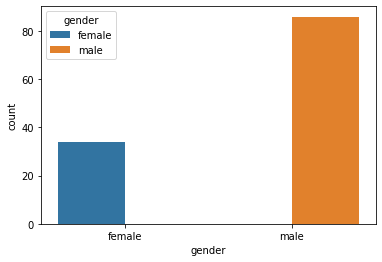

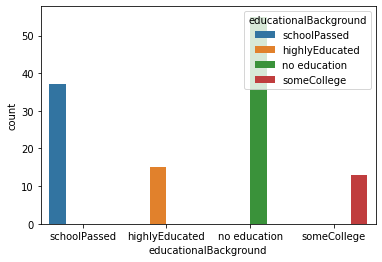

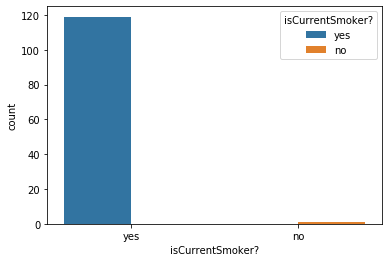

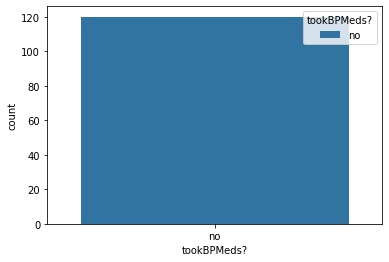

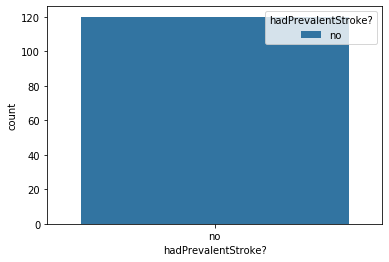

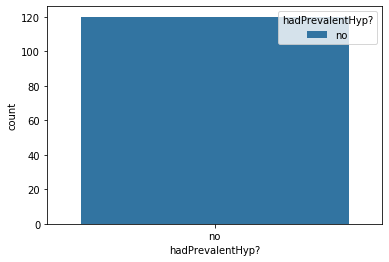

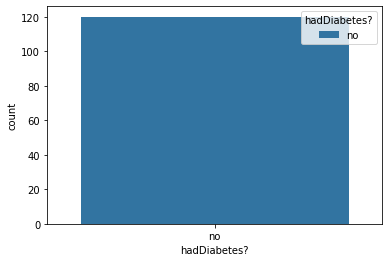

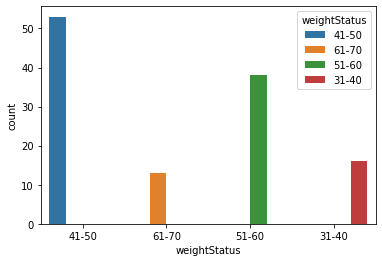

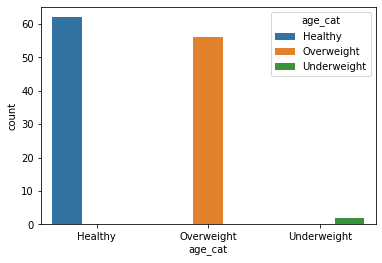

average  cigsPerDay for this cluster:  21
average  totChol for this cluster:  233
average  sysBP for this cluster:  122
average  diaBP for this cluster:  77
average  heartRate for this cluster:  74
average  glucose for this cluster:  76


In [0]:
#count plots for cluster 2:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","weightStatus","age_cat"]
num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
df_ext = df_analysis[df_analysis["clusterAlloted"]==1]
df_ext = df_ext[df_ext["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()
for i in num_var:
  print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))

Conclusion for cluster 1 who are found to be diagnosed with CHD:



*   Most of them are highly educated males.

*   Most of them don't suffer from diabetes.
*   Most of them are current smokers and they don't take BP medications


*   Almost all of them didn't have any prevalent stroke in the past.
*   Most of them are of age 50+




In [0]:
#count plots for cluster 3:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","weightStatus","age_cat"]
num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
df_ext = df_analysis[df_analysis["clusterAlloted"]==2]
df_ext = df_ext[df_ext["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()
for i in num_var:
  print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))

ValueError: ignored

Conclusion for cluster 3 who are found to be diagnosed with CHD:


*   Most of them are uneducated females.
*   They are not current smokers.

*   No one took BP Medications before, or had diabetes or any prevalent stroke.
*   More than half of them suffered from prevalent hypertension.
*   Most of them are of age group 50+







In [0]:
#count plots for cluster 4:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","weightStatus","age_cat"]
num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
df_ext = df_analysis[df_analysis["clusterAlloted"]==3]
df_ext = df_ext[df_ext["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()
for i in num_var:
  print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))

Conclusion for cluster 4 who are found to be diagnosed with CHD:


*   Most of them are females.
*   None of them are highly educated, majority is again from uneducated ones.



*   They are not current smokers.

*   No one took BP Medications before, or had diabetes or any prevalent stroke.
*   More than half of them suffered from prevalent hypertension.
*   Most of them are of age group 41-50

Final conclusions:


* Most females suffer from CHD because of hypertension.
*   List item
*   List item
*   List item



In [0]:
#count plots for cluster 5:
cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","weightStatus","age_cat"]
num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
df_ext = df_analysis[df_analysis["clusterAlloted"]==4]
df_ext = df_ext[df_ext["TenYearCHD"]==1]
for i in cat_var:
  sns.countplot(x = str(i),hue = str(i), data = df_ext)
  plt.show()
for i in num_var:
  print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))

## Clusters for Non CHD people:

In [0]:
# Label encoder
for c in df.columns[df.dtypes == 'object']:
    df[c] = df[c].factorize()[0]
#df.drop(["BMI"],axis = 1, inplace=True)

In [0]:
#standard scaling:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
df_nonCHD = df1[df1["TenYearCHD"]==0]
df_CHD = df1[df1["TenYearCHD"]==1]
scaler = StandardScaler()
scaler.fit(df_nonCHD)
df_nonCHD = scaler.transform(df_nonCHD)

In [0]:
df_nonCHD = pd.DataFrame(df_nonCHD)

In [0]:
 from sklearn.decomposition import PCA, KernelPCA
  
pca = KernelPCA(2, kernel = "rbf") 
pca.fit(df_nonCHD) 
  
pca_data = pd.DataFrame(pca.transform(df_nonCHD)) 
  
print(pca_data.head())

          0         1
0 -0.125551  0.167558
1  0.050206  0.313982
2 -0.216197 -0.367101
3 -0.234966 -0.216306
4  0.519879 -0.109269


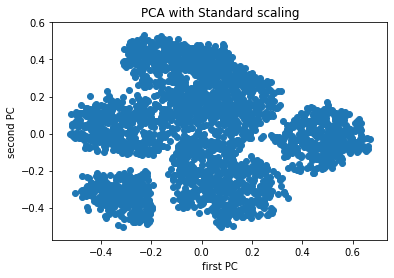

In [0]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
# Add title and axis names
plt.title('PCA with Standard scaling')
plt.xlabel('first PC')
plt.ylabel('second PC')

#plt.show()
plt.savefig('PCA with SS.png')

In [0]:
def makeClusters(numClusters):
  kmeans = KMeans(n_clusters=numClusters)
  kmeans.fit(pca_data)

  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  pred = kmeans.predict(pca_data)
  
  colors = ["g.","r.","c.","y.","m.","b.","k."]


  for i in range(len(pca_data)):
      plt.plot(pca_data.iloc[i][0], pca_data.iloc[i][1], colors[labels[i]], markersize = 10)


  plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
  
  # Add title and axis names
  plt.title('Clustering with 7 clusters')
  plt.xlabel('first PC')
  plt.ylabel('second PC')

  #plt.show()
  plt.savefig('Clustering with 7 clusters')
  
  return labels, pred

In [0]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_data) 
    kmeanModel.fit(pca_data)     
      
    distortions.append(sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / pca_data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1
2
3
4
5
6
7
8
9


In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.34416403308167
2 : 0.2707233840584634
3 : 0.202721677294983
4 : 0.16327770548844905
5 : 0.13836176311595583
6 : 0.11973388640145835
7 : 0.11187191801308517
8 : 0.10426368234130297
9 : 0.09781053355545366


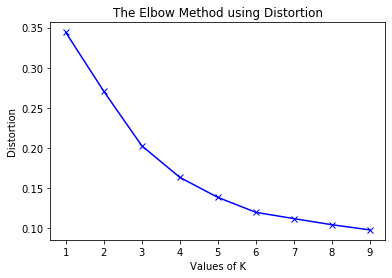

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

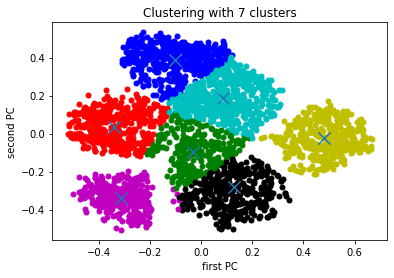

In [0]:
#choosing k=7:
labels, pred = makeClusters(7)

In [0]:
pred = pred.tolist()

In [0]:
len(pred)

3099

In [0]:
df_nonCHD = df[df["TenYearCHD"]==0]
df_nonCHD["clusterAlloted"] = pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_nonCHD.head(10)

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,weightStatus,clusterAlloted
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,80.0,77.0,0,1,2
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,95.0,76.0,0,1,2
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,75.0,70.0,0,1,4
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,85.0,85.0,0,0,4
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,77.0,99.0,0,1,3
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,79.0,78.0,0,0,1
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,76.0,79.0,0,1,3
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,93.0,88.0,0,0,6
10,0,50,1.0,0,0.0,0.0,0,0,0,254.0,133.0,76.0,75.0,76.0,0,0,5
11,0,43,2.0,0,0.0,0.0,0,0,0,247.0,131.0,88.0,72.0,61.0,0,1,2


In [0]:
def analysis(df_analysis, df_name, cluster_num, target):
  df_analysis = df_analysis[df_analysis["TenYearCHD"]==target]
  cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","age_cat","weightStatus"]
  num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
  df_analysis["clusterAlloted"] = df_name["clusterAlloted"]
  df_ext = df_analysis[df_analysis["clusterAlloted"]==cluster_num]

  #level of education: Less educated or Good level of Education:
  x = df_ext.educationalBackground.str.count("no education").sum()
  y = df_ext.educationalBackground.str.count("schoolPassed").sum()
  z = df_ext.educationalBackground.str.count("someCollege").sum()
  w = df_ext.educationalBackground.str.count("highlyEducated").sum()
  if(x>=0.8*(y+z+w)):
    dom = "Less educated"
  else:
    dom = "Good level of education"
  
  for i in cat_var:
    sns.countplot(x = str(i),hue = str(i), data = df_ext)
    plt.show()
  for i in num_var:
    print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))
  print("level of education: ", dom)

  return None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


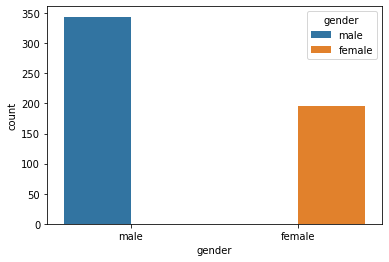

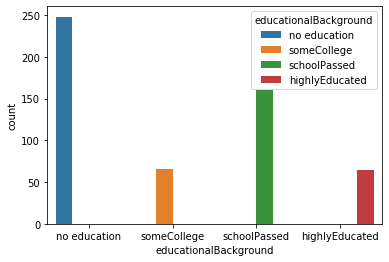

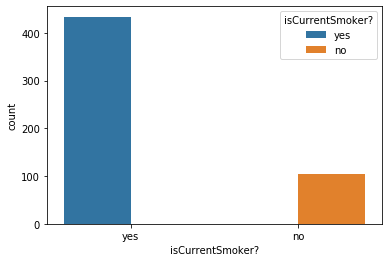

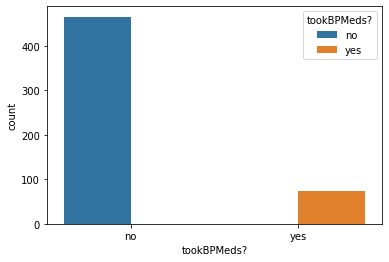

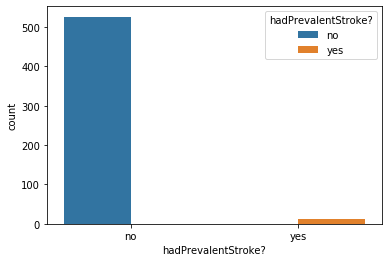

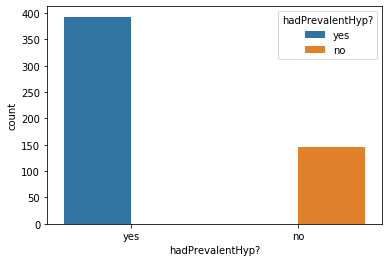

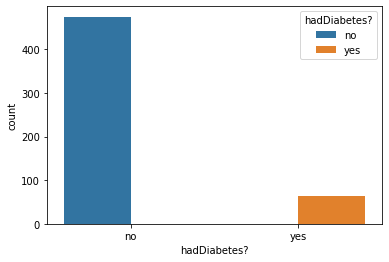

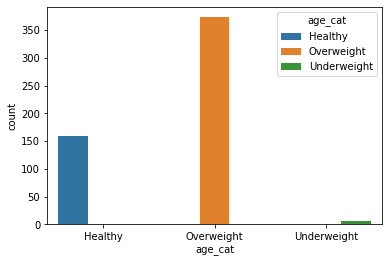

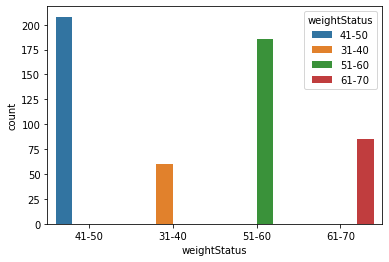

average  cigsPerDay for this cluster:  17
average  totChol for this cluster:  249
average  sysBP for this cluster:  148
average  diaBP for this cluster:  92
average  heartRate for this cluster:  80
average  glucose for this cluster:  88
level of education:  Less educated


In [0]:
analysis(df_analysis, df_nonCHD, cluster_num = 6, target = 0)

## Clustering for CHD people

In [0]:
# Label encoder
for c in df.columns[df.dtypes == 'object']:
    df[c] = df[c].factorize()[0]
#df.drop(["BMI"],axis = 1, inplace=True)

In [0]:
#standard scaling:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
df_nonCHD = df1[df1["TenYearCHD"]==0]
df_CHD = df1[df1["TenYearCHD"]==1]
scaler = StandardScaler()
scaler.fit(df_CHD)
df_CHD = scaler.transform(df_CHD)

In [0]:
df_CHD = pd.DataFrame(df_CHD)

In [0]:
 from sklearn.decomposition import PCA, KernelPCA
  
pca = KernelPCA(2, kernel = "rbf") 
pca.fit(df_CHD) 
  
pca_data = pd.DataFrame(pca.transform(df_CHD)) 
  
print(pca_data.head())

          0         1
0 -0.003418  0.316866
1  0.142515 -0.371296
2 -0.150148  0.211452
3 -0.370597 -0.224769
4 -0.356069 -0.112839


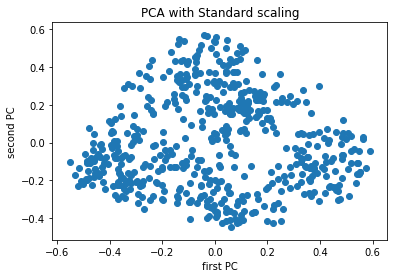

In [0]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
# Add title and axis names
plt.title('PCA with Standard scaling')
plt.xlabel('first PC')
plt.ylabel('second PC')

#plt.show()
plt.savefig('PCA with SS.png')

In [0]:
def makeClusters(numClusters):
  kmeans = KMeans(n_clusters=numClusters)
  kmeans.fit(pca_data)

  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  pred = kmeans.predict(pca_data)
  
  colors = ["g.","r.","c.","y.","m.","b.","k."]


  for i in range(len(pca_data)):
      plt.plot(pca_data.iloc[i][0], pca_data.iloc[i][1], colors[labels[i]], markersize = 10)


  plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
  
  # Add title and axis names
  plt.title('Clustering with 7 clusters')
  plt.xlabel('first PC')
  plt.ylabel('second PC')

  #plt.show()
  plt.savefig('Clustering with 7 clusters')
  
  return labels, pred

In [0]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_data) 
    kmeanModel.fit(pca_data)     
      
    distortions.append(sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / pca_data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1
2
3
4
5
6
7
8
9


In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.3470349513563873
2 : 0.2551955051571913
3 : 0.18577336847371986
4 : 0.15091148222807485
5 : 0.12975744733244307
6 : 0.12111729637373979
7 : 0.11276188438830405
8 : 0.10628717509477885
9 : 0.09993451971918738


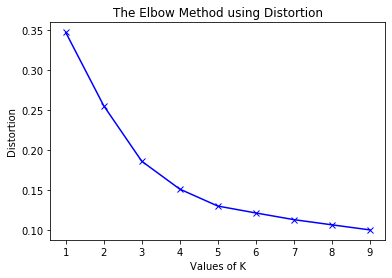

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

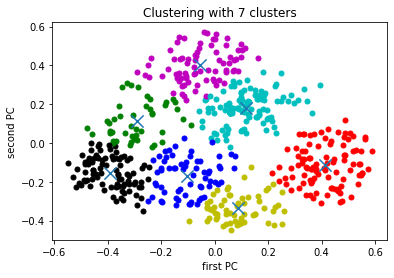

In [0]:
#choosing k=7:
labels, pred = makeClusters(7)

In [0]:
pred = pred.tolist()

In [0]:
len(pred)

557

In [0]:
df_CHD = df[df["TenYearCHD"]==1]
df_CHD["clusterAlloted"] = pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_CHD.head(10)

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,weightStatus,clusterAlloted
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,65.0,103.0,1,1,4
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,60.0,85.0,1,1,3
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,95.0,70.0,1,0,0
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,80.0,89.0,1,0,6
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,62.0,66.0,1,0,6
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,85.0,65.0,1,1,1
32,0,59,1.0,0,0.0,0.0,0,1,0,209.0,150.0,85.0,90.0,88.0,1,0,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,76.0,215.0,1,0,2
48,0,63,2.0,1,40.0,0.0,0,0,0,179.0,116.0,69.0,95.0,75.0,1,0,0
50,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,60.0,79.0,1,1,2


In [0]:
def analysis(df_analysis, df_name, cluster_num, target):
  df_analysis = df_analysis[df_analysis["TenYearCHD"]==target]
  cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","age_cat","weightStatus"]
  num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
  df_analysis["clusterAlloted"] = df_name["clusterAlloted"]
  df_ext = df_analysis[df_analysis["clusterAlloted"]==cluster_num]

  #level of education: Less educated or Good level of Education:
  x = df_ext.educationalBackground.str.count("no education").sum()
  y = df_ext.educationalBackground.str.count("schoolPassed").sum()
  z = df_ext.educationalBackground.str.count("someCollege").sum()
  w = df_ext.educationalBackground.str.count("highlyEducated").sum()
  if(x>=0.8*(y+z+w)):
    dom = "Less educated"
  else:
    dom = "Good level of education"
  for i in cat_var:
    sns.countplot(x = str(i),hue = str(i), data = df_ext)
    plt.show()
  for i in num_var:
    print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))
  print("level of education: ", dom)

  return None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


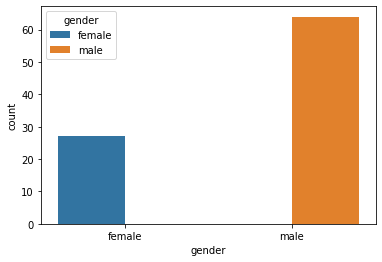

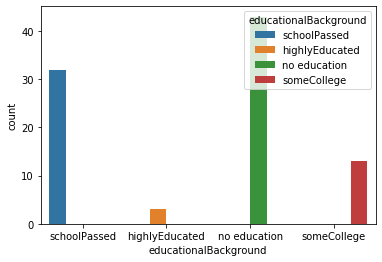

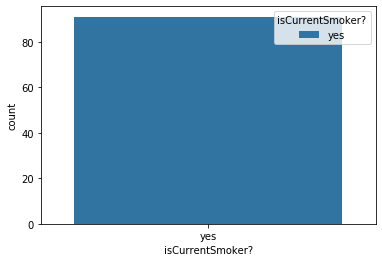

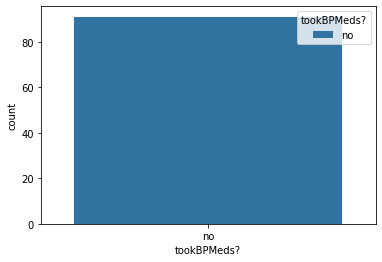

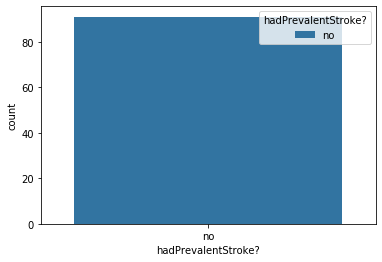

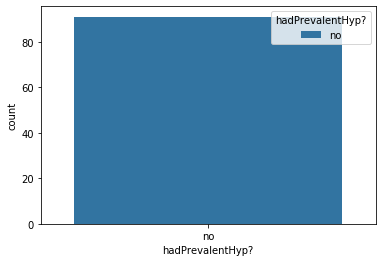

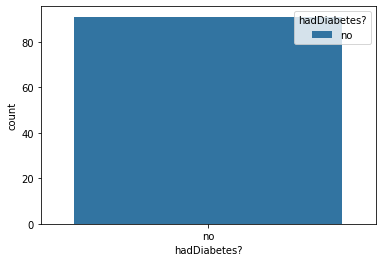

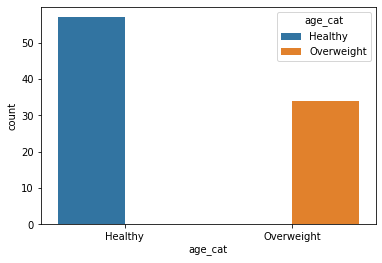

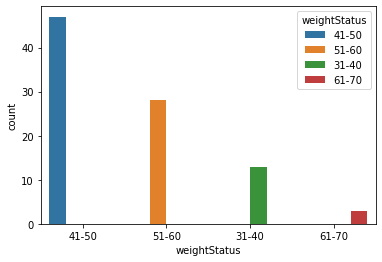

average  cigsPerDay for this cluster:  20
average  totChol for this cluster:  234
average  sysBP for this cluster:  121
average  diaBP for this cluster:  77
average  heartRate for this cluster:  74
average  glucose for this cluster:  75
level of education:  Less educated


In [0]:
analysis(df_analysis, df_CHD, cluster_num = 6, target = 1)

## Clustering of New dataset

In [0]:
df = pd.read_excel("updated dataset.xlsx")

In [0]:
df.shape

(43869, 12)

In [0]:
df.describe(include="all")

,Age Group,Gender,Length of Stay,Type of Admission,CCS Diagnosis Description,APR Severity of Illness Code,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Total Charges,Total Costs
count,43869,43869,43869.0,43869,43869,43869.000000,43869,30072,12463,43869,4.386900e+04,4.386900e+04
unique,5,3,99.0,5,5,NaN,10,10,10,2,NaN,NaN
top,70 or Older,M,2.0,Emergency,Congestive heart failure; nonhypertensive,NaN,Medicare,Medicare,Self-Pay,Y,NaN,NaN
freq,24755,23350,7009.0,34111,24136,NaN,30784,10575,6840,31639,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.491395,NaN,NaN,NaN,NaN,5.304665e+04,1.860477e+04
std,NaN,NaN,NaN,NaN,NaN,0.836039,NaN,NaN,NaN,NaN,1.060547e+05,3.381600e+04
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000e+00,2.900000e-01
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.348731e+04,5.190560e+03
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.563585e+04,9.521760e+03
75%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,5.955477e+04,2.126469e+04


In [0]:
df["APR Severity of Illness Code"].value_counts()

3    17573
2    16447
1     5238
4     4611
Name: APR Severity of Illness Code, dtype: int64

In [0]:
df['Age Group'] = df.apply(lambda row: age_wrangler(row), axis=1)

In [0]:
df["Age Group"].value_counts()

50 to 69    15634
30 to 49     3011
Name: Age Group, dtype: int64

In [0]:
df.drop(df[df['Age Group'] == "70 or Older"].index, inplace = True) 

In [0]:
df.drop(df[df['Age Group'] == "18 to 29"].index, inplace = True) 

In [0]:
df.drop(df[df['Age Group'] == "0 to 17"].index, inplace = True) 

In [0]:
df.drop(columns=['Payment Typology 2', 'Payment Typology 3'], inplace=True)

In [0]:
df.drop(df[df['Gender'] == "U"].index, inplace = True) 

In [0]:
df.drop(columns=['Total Charges'], inplace=True)

In [0]:
df.dtypes

Age Group                          object
Gender                             object
Length of Stay                     object
Type of Admission                  object
CCS Diagnosis Description          object
APR Severity of Illness Code       object
Payment Typology 1                 object
Emergency Department Indicator     object
Total Costs                       float64
dtype: object

In [0]:
df['APR Severity of Illness Code'] = df['APR Severity of Illness Code'].apply(str)

In [0]:
# Label encoder
for c in df.columns[df.dtypes == 'object']:
    df[c] = df[c].factorize()[0]
#df.drop(["BMI"],axis = 1, inplace=True)

In [0]:
df.head(10)

,Age Group,Gender,Length of Stay,Type of Admission,CCS Diagnosis Description,APR Severity of Illness Code,Payment Typology 1,Emergency Department Indicator,Total Costs
0,0,0,0,0,0,0,0,0,12368.29
8,1,1,1,0,1,1,1,0,5142.43
9,0,0,2,0,0,0,2,0,21941.23
11,0,1,3,0,0,0,0,0,13689.31
12,0,0,4,0,1,1,0,0,10277.88
13,0,0,0,0,0,1,3,0,8118.96
14,0,0,5,0,0,0,2,0,44958.18
15,0,1,6,0,0,1,4,0,14665.42
17,0,0,1,0,1,2,5,0,4873.76
19,0,0,2,0,1,2,5,0,3310.15


In [0]:
#standard scaling:
from sklearn.preprocessing import StandardScaler
df1 = df.copy()
#df_nonCHD = df1[df1["TenYearCHD"]==0]
#df_CHD = df1[df1["TenYearCHD"]==1]
scaler = StandardScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

In [0]:
df1 = pd.DataFrame(df1)

In [0]:
 from sklearn.decomposition import PCA, KernelPCA
  
pca = KernelPCA(2, kernel = "rbf") 
pca.fit(df1) 
  
pca_data = pd.DataFrame(pca.transform(df1)) 
  
print(pca_data.head())

          0         1
0 -0.431980 -0.242118
1  0.080149  0.381936
2 -0.420452 -0.255298
3 -0.375859  0.444991
4 -0.395876 -0.353371


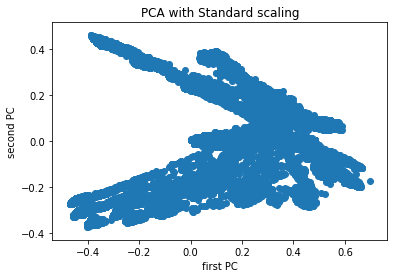

In [0]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
# Add title and axis names
plt.title('PCA with Standard scaling')
plt.xlabel('first PC')
plt.ylabel('second PC')

#plt.show()
plt.savefig('PCA with SS.png')

In [0]:
def makeClusters(numClusters):
  kmeans = KMeans(n_clusters=numClusters)
  kmeans.fit(pca_data)

  centroids = kmeans.cluster_centers_
  labels = kmeans.labels_

  pred = kmeans.predict(pca_data)
  
  colors = ["g.","r.","c.","y.","m.","b.","k."]


  for i in range(len(pca_data)):
      plt.plot(pca_data.iloc[i][0], pca_data.iloc[i][1], colors[labels[i]], markersize = 10)


  plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
  
  # Add title and axis names
  plt.title('Clustering with 7 clusters')
  plt.xlabel('first PC')
  plt.ylabel('second PC')

  #plt.show()
  plt.savefig('Clustering with 7 clusters')
  
  return labels, pred

In [0]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_data) 
    kmeanModel.fit(pca_data)     
      
    distortions.append(sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(pca_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / pca_data.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1
2
3
4
5
6
7
8
9


In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.39660620853326145
2 : 0.29286464343027635
3 : 0.1773159925414878
4 : 0.1435564128873177
5 : 0.12121697050155199
6 : 0.10310843177402225
7 : 0.09189735570076898
8 : 0.08566278921553187
9 : 0.07712849784423774


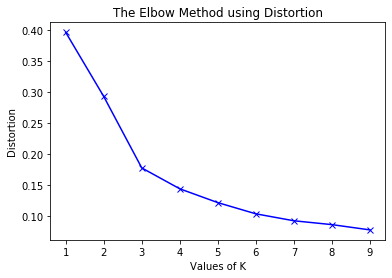

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

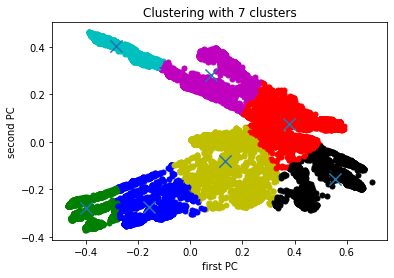

In [0]:
#choosing k=7:
labels, pred = makeClusters(7)

In [0]:
pred = pred.tolist()

In [0]:
len(pred)

557

In [0]:
df_CHD = df[df["TenYearCHD"]==1]
df_CHD["clusterAlloted"] = pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df_CHD.head(10)

,isMale,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,weightStatus,clusterAlloted
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,65.0,103.0,1,1,4
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,60.0,85.0,1,1,3
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,95.0,70.0,1,0,0
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,80.0,89.0,1,0,6
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,62.0,66.0,1,0,6
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,85.0,65.0,1,1,1
32,0,59,1.0,0,0.0,0.0,0,1,0,209.0,150.0,85.0,90.0,88.0,1,0,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,76.0,215.0,1,0,2
48,0,63,2.0,1,40.0,0.0,0,0,0,179.0,116.0,69.0,95.0,75.0,1,0,0
50,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,60.0,79.0,1,1,2


In [0]:
def analysis(df_analysis, df_name, cluster_num, target):
  df_analysis = df_analysis[df_analysis["TenYearCHD"]==target]
  cat_var = ["gender","educationalBackground","isCurrentSmoker?","tookBPMeds?","hadPrevalentStroke?","hadPrevalentHyp?","hadDiabetes?","age_cat","weightStatus"]
  num_var = ["cigsPerDay","totChol","sysBP","diaBP","heartRate","glucose"]
  df_analysis["clusterAlloted"] = df_name["clusterAlloted"]
  df_ext = df_analysis[df_analysis["clusterAlloted"]==cluster_num]

  #level of education: Less educated or Good level of Education:
  x = df_ext.educationalBackground.str.count("no education").sum()
  y = df_ext.educationalBackground.str.count("schoolPassed").sum()
  z = df_ext.educationalBackground.str.count("someCollege").sum()
  w = df_ext.educationalBackground.str.count("highlyEducated").sum()
  if(x>=0.8*(y+z+w)):
    dom = "Less educated"
  else:
    dom = "Good level of education"
  for i in cat_var:
    sns.countplot(x = str(i),hue = str(i), data = df_ext)
    plt.show()
  for i in num_var:
    print("average ",i, "for this cluster: ", round(statistics.mean(df_ext[i])))
  print("level of education: ", dom)

  return None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


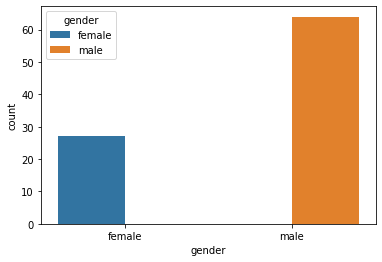

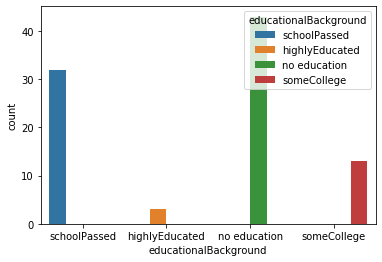

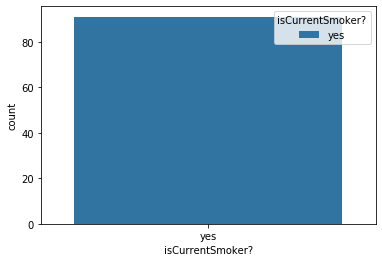

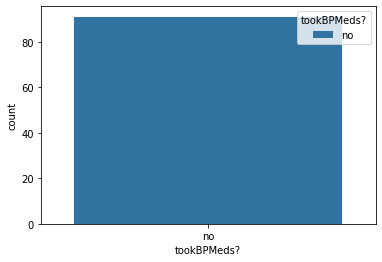

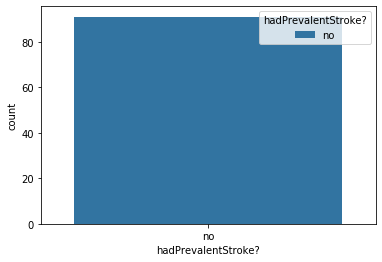

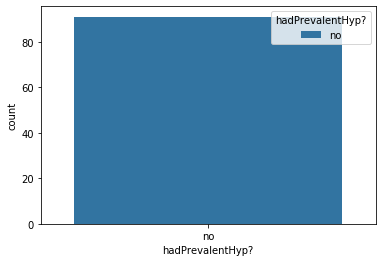

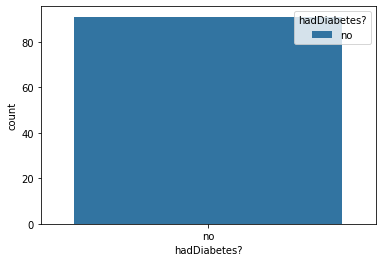

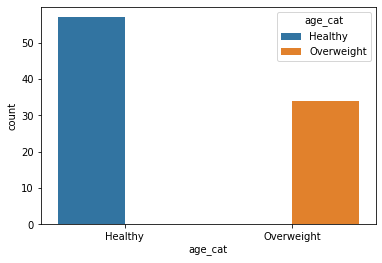

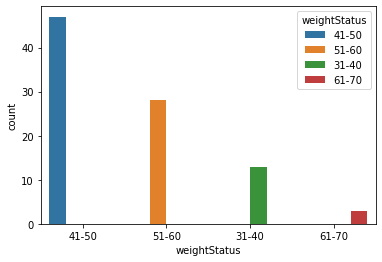

average  cigsPerDay for this cluster:  20
average  totChol for this cluster:  234
average  sysBP for this cluster:  121
average  diaBP for this cluster:  77
average  heartRate for this cluster:  74
average  glucose for this cluster:  75
level of education:  Less educated


In [0]:
analysis(df_analysis, df_CHD, cluster_num = 6, target = 1)